# Overview of Week 3

This week's assignment consists of two parts. The first part gives you an introduction to unsupervised learning. In particular, we focus on techniques for clustering and dimensionality reduction and how they can be applied to ecommerce data. As you work through the three clustering case studies, you will find yourself generating many intermediate datasets, trying different models, and tuning each model as you go along. There's a lot to keep track of.   

This is where Part 2 comes in. It is in Part 2 that we introduce ideas of **workflow management** and **computational reproducibility**. Workflow management means organising your project directory to manage your analysis' artefacts (visualisations, processed datasets, notebooks and utility functions and experiment results). Ideally, your code for these should be clearly commented with well chosen names. Computational reproducibility means someone else (including future you!) being able to take just the code and data, and reproduce your project, from its results and models to visualisations etc. How one decides to practice workflow management and computational reproducibility can be quite a personal decision. Therefore, we provide guidelines, not rules. The most important is having a system rather than no system at all. 

**note about the week**   
While week 1's assignment was guided, with specific instructions about what code to run, as we move on the assignments will involve less hand-holding. For this week, we include some instructions, but leave the specific implementations up to you. There are also many techniques we cover. Again, while we share some resources, we leave the bulk of the research and background reading up to you to manage for yourself. As a record of how well you have synthesised your readings, this notebook has space for writing a few paragraphs of explanations. We hope you won't be content with a shallow explanation, and that you use this space to apply the [Feynmann technique](https://collegeinfogeek.com/feynman-technique/) as a check of understanding. 

To tie Part 1 and Part 2 of the week together, we are not just asking for one Jupyter Notebook as a final deliverable. Instead, there are four deliverables to the week: 

**1. Part 1 Notebook I and II exercises presented at the end of the week job-interview style**

**2. A script that automates the data cleaning and feature engineering steps you take so your findings are reproducible (see Part 2 Notebook I for more info)**

**3. A repo README.md (see Part 2 Notebook I for more info)**

**4  A record of software package versions and software environment used (see Part 2 Notebook I for more info)**   

**recap of the objectives for the first 6 weeks:**  
We aim to broadly cover a wide range of Machine Learning algorithms so that you can: 
- handle the technical demands of a 100E given some guidance on the right direction to take 
- can handle a technical job interview and get hired 

*materials for unsupervised learning adapted from William Thji* 

# Part I : Unsupervised Learning 
Unsupervised Learning refers to a set of machine learning techniques where no output variables (Y) are given. Only the input variables (X) are available and our job is to find patterns in X. You may read more about it from *pg 485 from Hastie and Tibshirani's Elements of Statistical Learning* available [here](https://web.stanford.edu/~hastie/Papers/ESLII.pdf). 

ESL by Hastie et. al with be the primary reference for this week, although feel free to source for your own books and links. 

## Short introduction to clustering 
Clustering puts datapoints into subsets so that datapoints within a cluster are more closely related to one another compared to datapoints in another cluster. More information is available from page 501 of *Elements of Statistical Learning*. 

Some quick points: 
- Clustering is extremely useful to many fields: 
    - Customer segmentation for personalised product recommendations
    - Topic identification to relieve the need to manually vet documents 
    - Image or geo-spatial segmentation to optimised supply and demand (Gojek does this) 
    - and maybe most importantly, getting a sense of the data before starting to model it. 

- Some examples of clustering algorithms: 
    - KMeans
    - Gaussian Mixture Models for drawing soft clustering boundaries instead of hard ones 
    - Hierarchical clustering
    - DBScan for density-based clustering for anomaly detection 
    - Co-clustering
    - Biclustering for analysing genes

## Deliverable 1: Complete the Clustering Case Study: Using PCA and clustering to uncover customer segments 
Context: The dataset we will be working with contains ecommerce transactions from a UK-based online retails store. The dataset is available on [Kaggle](https://www.kaggle.com/carrie1/ecommerce-data/home) or the UCI Machine Learning Repository. The dataset is quite small, so we have also included it inside the `data` folder inside this repo as `data/raw/data.csv`. 

From the Kaggle website: 

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

### Case Study Goal 
Cluster the dataset into meaningful customer segments. This means creating clusters that are statistically robust and that make business sense. 


In [1]:
import pandas as pd 
df = pd.read_csv('data/raw/data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Cleaning data 

Some data types are muddled, there are duplicates, NA values and unreasonable values hiding in the columns 

1. Clean the dataset. You may want to list the steps taken to clean the data and encapsulate the steps inside their own functions so they can be reused. Organise the functions into their own library

In [2]:
print(df.describe())

print(df.info())

print(df.shape)

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
(541909, 8)


In [3]:
def remove_dup(df):
    print('Num Dup:',df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    return df

def remove_neg(df):
    #cols = ['Quantity','UnitPrice']
    #df = df[df[cols] >= 0]
    df = df[df['Quantity'] >= 0]
    df = df[df['UnitPrice'] >= 0]
    return df

def remove_missing(df):
    print('Num Na:', df.isna().sum())
    df.dropna(subset=['CustomerID'],inplace=True)
    return df


In [4]:
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [5]:
df = remove_dup(df)

Num Dup: 5268


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df = remove_neg(df)

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,526052.000000,526052.000000,392732.000000
mean,10.730911,3.913818,15287.734822
std,157.592136,36.053205,1713.567773
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [9]:
df = remove_missing(df)

Num Na: InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133320
Country             0
dtype: int64


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Feature Engineering iteration #1 

Inside the dataset, each row contains information about an ecommerce transation. However, we want to cluster the data by customers, which means each row should instead contain information about a customer. 

1. Reshape the data to follow the format below: 
![alt text](customer.png)

The dataframe should have these columns: `['NoOfInvoices', 'NoOfUniqueItems', 'QuantityPerInvoice', 'TotalQuantity', 'UniqueItemsPerInvoice','UnitPriceMean','UnitPriceStd']` 
2. Save this dataset as an intermediate dataset 

In [12]:
df2 = df.copy()
df2['TotalPrice'] = df2['Quantity'] * df2['UnitPrice']

print(df2.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom       15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom       22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  


In [13]:
aggregations = {
    'InvoiceNo':{
        'NoOfInvoices': lambda x: x.nunique()
    },
    'StockCode':{
        'NoOfUniqueItems': lambda x: x.nunique()
    },
    'Quantity':{
        'TotalQuantity':'sum'
    },
    'UnitPrice':{
        'UnitPriceMean':'mean',
        'UnitPriceStd':'std'
    },
    'TotalPrice':{
        'TotalSpend':'sum'
    }
    
}

df3 = df2.groupby('CustomerID').agg(aggregations)

df3.columns = df3.columns.droplevel(level=0)

df3['QuantityPerInvoice'] = df3['TotalQuantity']/df3['NoOfInvoices']

df3['SpendingPerInvoice'] = df3['TotalSpend']/df3['NoOfInvoices']

df3['UnqiueItemsPerInvoice'] = df3['NoOfUniqueItems']/df3['NoOfInvoices']

df4 = df3[['NoOfInvoices', 'NoOfUniqueItems', 'QuantityPerInvoice', 'SpendingPerInvoice','TotalQuantity', 'UnqiueItemsPerInvoice','UnitPriceMean','UnitPriceStd']]

df4.dropna(subset=['UnitPriceStd'],inplace=True)

print(df4.head())

C:\Users\Daniel\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


            NoOfInvoices  NoOfUniqueItems  QuantityPerInvoice  \
CustomerID                                                      
12347.0                7              103          351.142857   
12348.0                4               22          585.250000   
12349.0                1               73          631.000000   
12350.0                1               17          197.000000   
12352.0                8               59           67.000000   

            SpendingPerInvoice  TotalQuantity  UnqiueItemsPerInvoice  \
CustomerID                                                             
12347.0             615.714286           2458              14.714286   
12348.0             449.310000           2341               5.500000   
12349.0            1757.550000            631              73.000000   
12350.0             334.400000            197              17.000000   
12352.0             313.255000            536               7.375000   

            UnitPriceMean  UnitPriceStd

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Hierarchical clustering iteration #1 [reference pg 520](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

1. Implement any more preprocessing or visualisation steps you feel are necessary to understand how you might build meaningful clusters from the data. 
2. Apply hierarchical clustering to the dataset. 
2. Experiment with different linkage algorithms. Visualise the resulting trees for average linkage, complete linkage and single linkage side-by-side. Which linkage algorithm works best? 
3. List two ways to improve the clustering and implement at least one. Track the results of the first iteration and second iteration (whether with Excel, TextEdit or within this notebook itself). 
4. Describe the clusters you selected and evaluate whether or not they form meaningful segments. 

In [14]:
df4.describe()

,NoOfInvoices,NoOfUniqueItems,QuantityPerInvoice,SpendingPerInvoice,TotalQuantity,UnqiueItemsPerInvoice,UnitPriceMean,UnitPriceStd
count,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000
mean,4.327162,62.509960,236.025611,401.615788,1187.078978,18.988200,3.707265,4.401527
std,7.758414,85.715729,681.158710,1375.837695,4966.232923,17.155734,10.928314,18.931539
min,1.000000,1.000000,1.000000,3.450000,2.000000,0.200000,0.122500,0.000000
25%,1.000000,17.000000,93.500000,179.709554,164.000000,8.000000,2.212675,1.811056
50%,2.000000,36.000000,162.000000,294.468000,387.000000,14.333333,2.917895,2.635532
75%,5.000000,79.000000,271.083333,428.533750,1000.500000,24.000000,3.815225,3.576768
max,210.000000,1787.000000,40498.500000,84236.250000,197491.000000,219.000000,434.650000,602.440835


In [15]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [16]:
scaled = preprocessing.scale(df4)
df_scaled = pd.DataFrame(scaled)
df_scaled.columns = df4.columns
df_scaled.describe()

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,NoOfInvoices,NoOfUniqueItems,QuantityPerInvoice,SpendingPerInvoice,TotalQuantity,UnqiueItemsPerInvoice,UnitPriceMean,UnitPriceStd
count,4.267000e+03,4.267000e+03,4.267000e+03,4.267000e+03,4.267000e+03,4.267000e+03,4.267000e+03,4.267000e+03
mean,-1.518784e-16,1.088075e-17,-2.510816e-17,-4.894140e-17,2.533583e-18,-1.076025e-16,2.064593e-17,8.125677e-17
std,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00
min,-4.288959e-01,-7.176882e-01,-3.450784e-01,-2.894327e-01,-2.386553e-01,-1.095284e+00,-3.280639e-01,-2.325243e-01
25%,-4.288959e-01,-5.310028e-01,-2.092645e-01,-1.613070e-01,-2.060312e-01,-6.405723e-01,-1.367791e-01,-1.368497e-01
50%,-2.999885e-01,-3.093139e-01,-1.086887e-01,-7.788735e-02,-1.611227e-01,-2.713619e-01,-7.224015e-02,-9.329417e-02
75%,8.673382e-02,1.924031e-01,5.147381e-02,1.956707e-02,-3.757392e-02,2.921698e-01,9.880027e-03,-4.357046e-02
max,2.651276e+01,2.012107e+01,5.911573e+01,6.094066e+01,3.953236e+01,1.165996e+01,3.943822e+01,3.159328e+01


In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_scaled) 

array([4, 4, 0, ..., 4, 0, 0], dtype=int64)

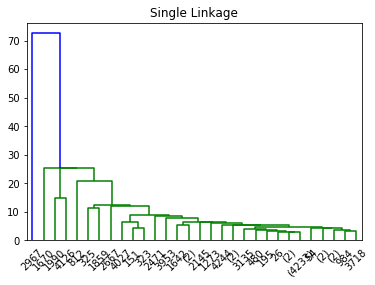

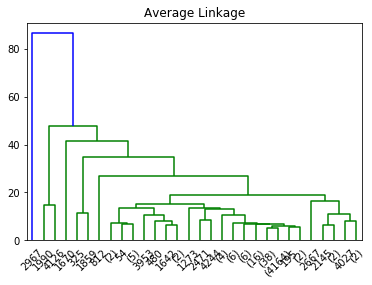

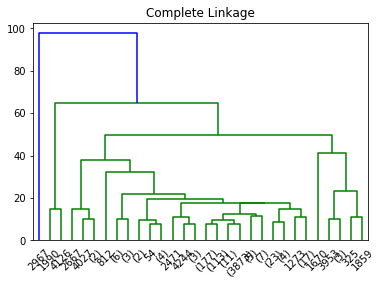

<Figure size 432x288 with 0 Axes>

In [19]:
import scipy.cluster.hierarchy as shc

#Single
shc.dendrogram(shc.linkage(df_scaled, method='single'),truncate_mode='lastp') 
plt.title('Single Linkage')
plt.figure();

#Average
shc.dendrogram(shc.linkage(df_scaled, method='average'),truncate_mode='lastp') 
plt.title('Average Linkage')
plt.figure();

#Complete
shc.dendrogram(shc.linkage(df_scaled, method='complete'),truncate_mode='lastp') 
plt.title('Complete Linkage')
plt.figure();

The first way to improve hierachical clustering is to remove the outliers in the dataset. Another way will be to improve the features in the dataset.

In [20]:
#Remove outliers
df_scaled2 = df_scaled.copy()
df_scaled2 = df_scaled2[df_scaled2<3].dropna()
df_scaled2.describe()

,NoOfInvoices,NoOfUniqueItems,QuantityPerInvoice,SpendingPerInvoice,TotalQuantity,UnqiueItemsPerInvoice,UnitPriceMean,UnitPriceStd
count,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000
mean,-0.086990,-0.094018,-0.043235,-0.039316,-0.082312,-0.072019,-0.040170,-0.056382
std,0.490143,0.651958,0.278405,0.216096,0.232585,0.778319,0.167694,0.213217
min,-0.428896,-0.717688,-0.344344,-0.289433,-0.238655,-1.095284,-0.328064,-0.232524
25%,-0.428896,-0.542671,-0.211367,-0.163580,-0.206837,-0.640572,-0.135939,-0.137163
50%,-0.299988,-0.326816,-0.114415,-0.084475,-0.164949,-0.290794,-0.070733,-0.093212
75%,-0.042174,0.122396,0.036669,0.010214,-0.054792,0.263022,0.010326,-0.043947
max,2.922697,2.992684,2.974655,2.882338,2.474786,2.973803,2.493804,2.982197


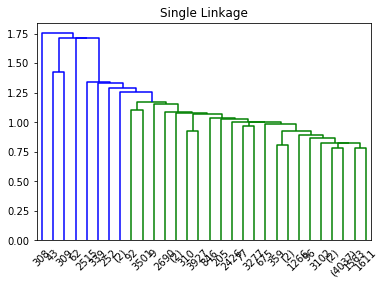

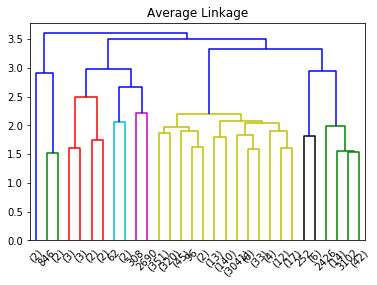

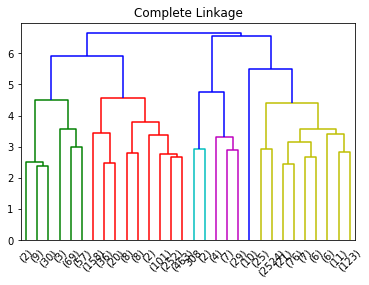

<Figure size 432x288 with 0 Axes>

In [21]:
import scipy.cluster.hierarchy as shc

#Single
shc.dendrogram(shc.linkage(df_scaled2, method='single'),truncate_mode='lastp') 
plt.title('Single Linkage')
plt.figure();

#Average
shc.dendrogram(shc.linkage(df_scaled2, method='average'),truncate_mode='lastp') 
plt.title('Average Linkage')
plt.figure();

#Complete
shc.dendrogram(shc.linkage(df_scaled2, method='complete'),truncate_mode='lastp') 
plt.title('Complete Linkage')
plt.figure();

In [235]:
single = shc.linkage(df_scaled2, method='single')
average = shc.linkage(df_scaled2, method='average')
complete = shc.linkage(df_scaled2, method='complete')

print('First Cluster:')
print('Single:',single[0])
print('Average:',average[0])
print('Complete:',complete[0])
print('\n')
print('Second Cluster:')
print('Single:',single[1])
print('Average:',average[1])
print('Complete:',complete[1])

First Cluster:
Single: [3.111e+03 3.765e+03 0.000e+00 2.000e+00]
Average: [3.111e+03 3.765e+03 0.000e+00 2.000e+00]
Complete: [3.111e+03 3.765e+03 0.000e+00 2.000e+00]


Second Cluster:
Single: [4.160e+02 2.139e+03 0.000e+00 2.000e+00]
Average: [4.160e+02 2.139e+03 0.000e+00 2.000e+00]
Complete: [4.160e+02 2.139e+03 0.000e+00 2.000e+00]


### K-means and GMM Clustering iteration #1 [reference pg 509](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)
Apart from hierarchical clustering, we can also apply KMeans and Gaussian Mixture Models (GMM) on the data

1. Implement K-means clustering on the data, experimenting with different values of k 
2. Implement a Gaussian Mixture Model on the data, experimenting with different values for the number of components.  
3. Visualise how well K-means and GMMs succeed at separating subgroups in the data
4. List two ways to improve the clustering and implement at least one. 
5. Describe the clusters and evaluate whether or not they form meaningful segments. 

In [24]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import mixture

In [250]:
Kmean_scores = []
nclusters = []
#K-Means
for ii in range(2,50):
    nclusters.append(ii)
    KM = KMeans(n_clusters=ii)
    labels = KM.fit_predict(df_scaled)
    Kmean_scores.append(metrics.silhouette_score(df_scaled,labels))

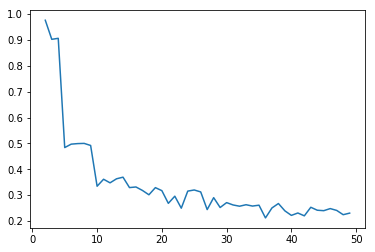

In [252]:
plt.plot(nclusters,Kmean_scores);

In [26]:
#GMM
GMM_scores = []
n_components = []
for ii in range(2,11):
    n_components.append(ii)
    gmm = mixture.GaussianMixture(n_components=ii)
    labels = gmm.fit_predict(df_scaled)
    GMM_scores.append(metrics.silhouette_score(df_scaled,labels))

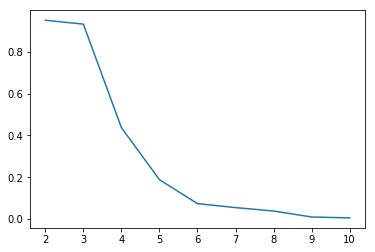

In [27]:
plt.plot(n_components,GMM_scores);

### Outliers 

1. Do outliers influence the results of your Hierarchical Clustering, K-means and GMM models?  
2. Do the outliers themselves form clusters? 

In [41]:
Kmean_scores = []
nclusters = []
#K-Means
for ii in range(2,11):
    nclusters.append(ii)
    KM = KMeans(n_clusters=ii)
    labels = KM.fit_predict(df_scaled2)
    Kmean_scores.append(metrics.silhouette_score(df_scaled2,labels))

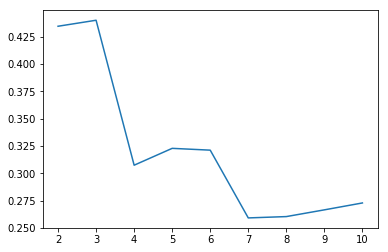

In [42]:
plt.plot(nclusters,Kmean_scores);

In [28]:
#GMM
GMM_scores = []
n_components = []
for ii in range(2,11):
    n_components.append(ii)
    gmm = mixture.GaussianMixture(n_components=ii)
    labels = gmm.fit_predict(df_scaled2)
    GMM_scores.append(metrics.silhouette_score(df_scaled2,labels))

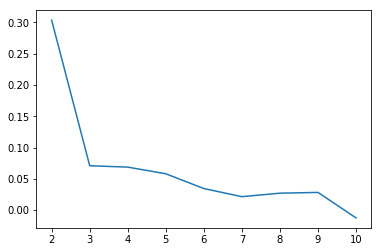

In [29]:
plt.plot(n_components,GMM_scores);

### Validating clusters  

1. Use at least three techniques to validate that your chosen clusters correspond to meaningful customer segments. You may consider a combination of using visualisations and/or quantitative metrics (refer to Elements of Statistical Learning for some examples)

In [268]:
#Calinski-Harabaz index
Kmean_scores = []
nclusters = []
#K-Means
for ii in range(2,11):
    nclusters.append(ii)
    KM = KMeans(n_clusters=ii)
    labels = KM.fit_predict(df_scaled2)
    Kmean_scores.append(metrics.calinski_harabaz_score(df_scaled2,labels))

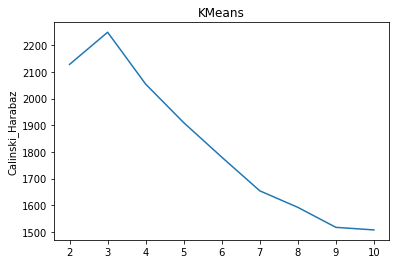

In [272]:
plt.plot(nclusters,Kmean_scores)
plt.ylabel('Calinski_Harabaz')
plt.title('KMeans')
plt.show()

In [30]:
#Calinski-Harabaz index
GMM_scores = []
n_components = []
for ii in range(2,11):
    n_components.append(ii)
    gmm = mixture.GaussianMixture(n_components=ii)
    labels = gmm.fit_predict(df_scaled2)
    GMM_scores.append(metrics.calinski_harabaz_score(df_scaled2,labels))

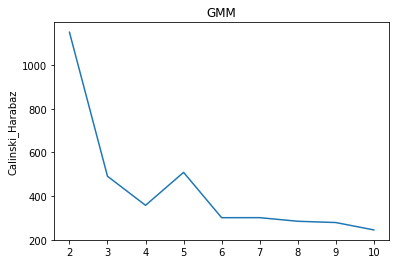

In [31]:
plt.plot(n_components,GMM_scores)
plt.ylabel('Calinski_Harabaz')
plt.title('GMM')
plt.show()

In [32]:
#Davies-Bouldin index
from sklearn.metrics import davies_bouldin_score
Kmean_scores = []
nclusters = []
#K-Means
for ii in range(2,11):
    nclusters.append(ii)
    KM = KMeans(n_clusters=ii)
    labels = KM.fit_predict(df_scaled2)
    Kmean_scores.append(davies_bouldin_score(df_scaled2,labels))

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_

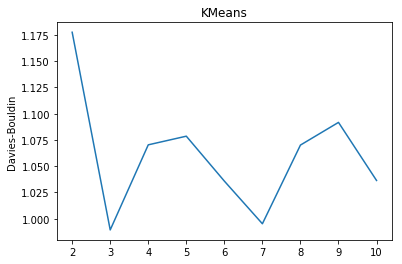

In [33]:
plt.plot(nclusters,Kmean_scores)
plt.ylabel('Davies-Bouldin')
plt.title('KMeans')
plt.show()

In [34]:
#Davies-Bouldin index
GMM_scores = []
n_components = []
for ii in range(2,11):
    n_components.append(ii)
    gmm = mixture.GaussianMixture(n_components=ii)
    labels = gmm.fit_predict(df_scaled2)
    GMM_scores.append(metrics.davies_bouldin_score(df_scaled2,labels))

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_

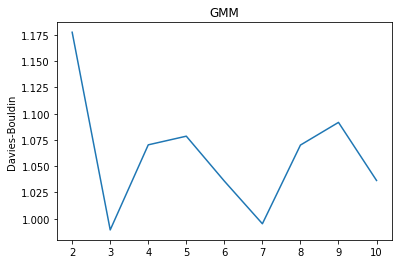

In [35]:
plt.plot(nclusters,Kmean_scores)
plt.ylabel('Davies-Bouldin')
plt.title('GMM')
plt.show()

In [47]:
#Silhouette score
#K-Means
Kmean_scores = []
nclusters = []
for ii in range(2,11):
    nclusters.append(ii)
    KM = KMeans(n_clusters=ii)
    labels = KM.fit_predict(df_scaled2)
    Kmean_scores.append(metrics.silhouette_score(df_scaled2,labels))

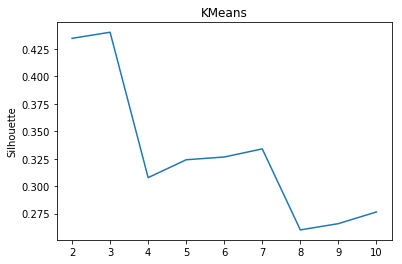

In [48]:
plt.plot(nclusters,Kmean_scores)
plt.ylabel('Silhouette')
plt.title('KMeans')
plt.show()

In [49]:
#Silhouette score
#GMM
GMM_scores = []
n_components = []
for ii in range(2,11):
    n_components.append(ii)
    gmm = mixture.GaussianMixture(n_components=ii)
    labels = gmm.fit_predict(df_scaled2)
    GMM_scores.append(metrics.silhouette_score(df_scaled2,labels))

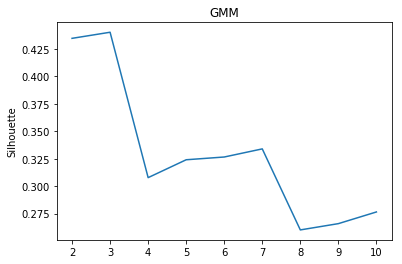

In [50]:
plt.plot(nclusters,Kmean_scores)
plt.ylabel('Silhouette')
plt.title('GMM')
plt.show()

C:\Users\Daniel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Daniel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


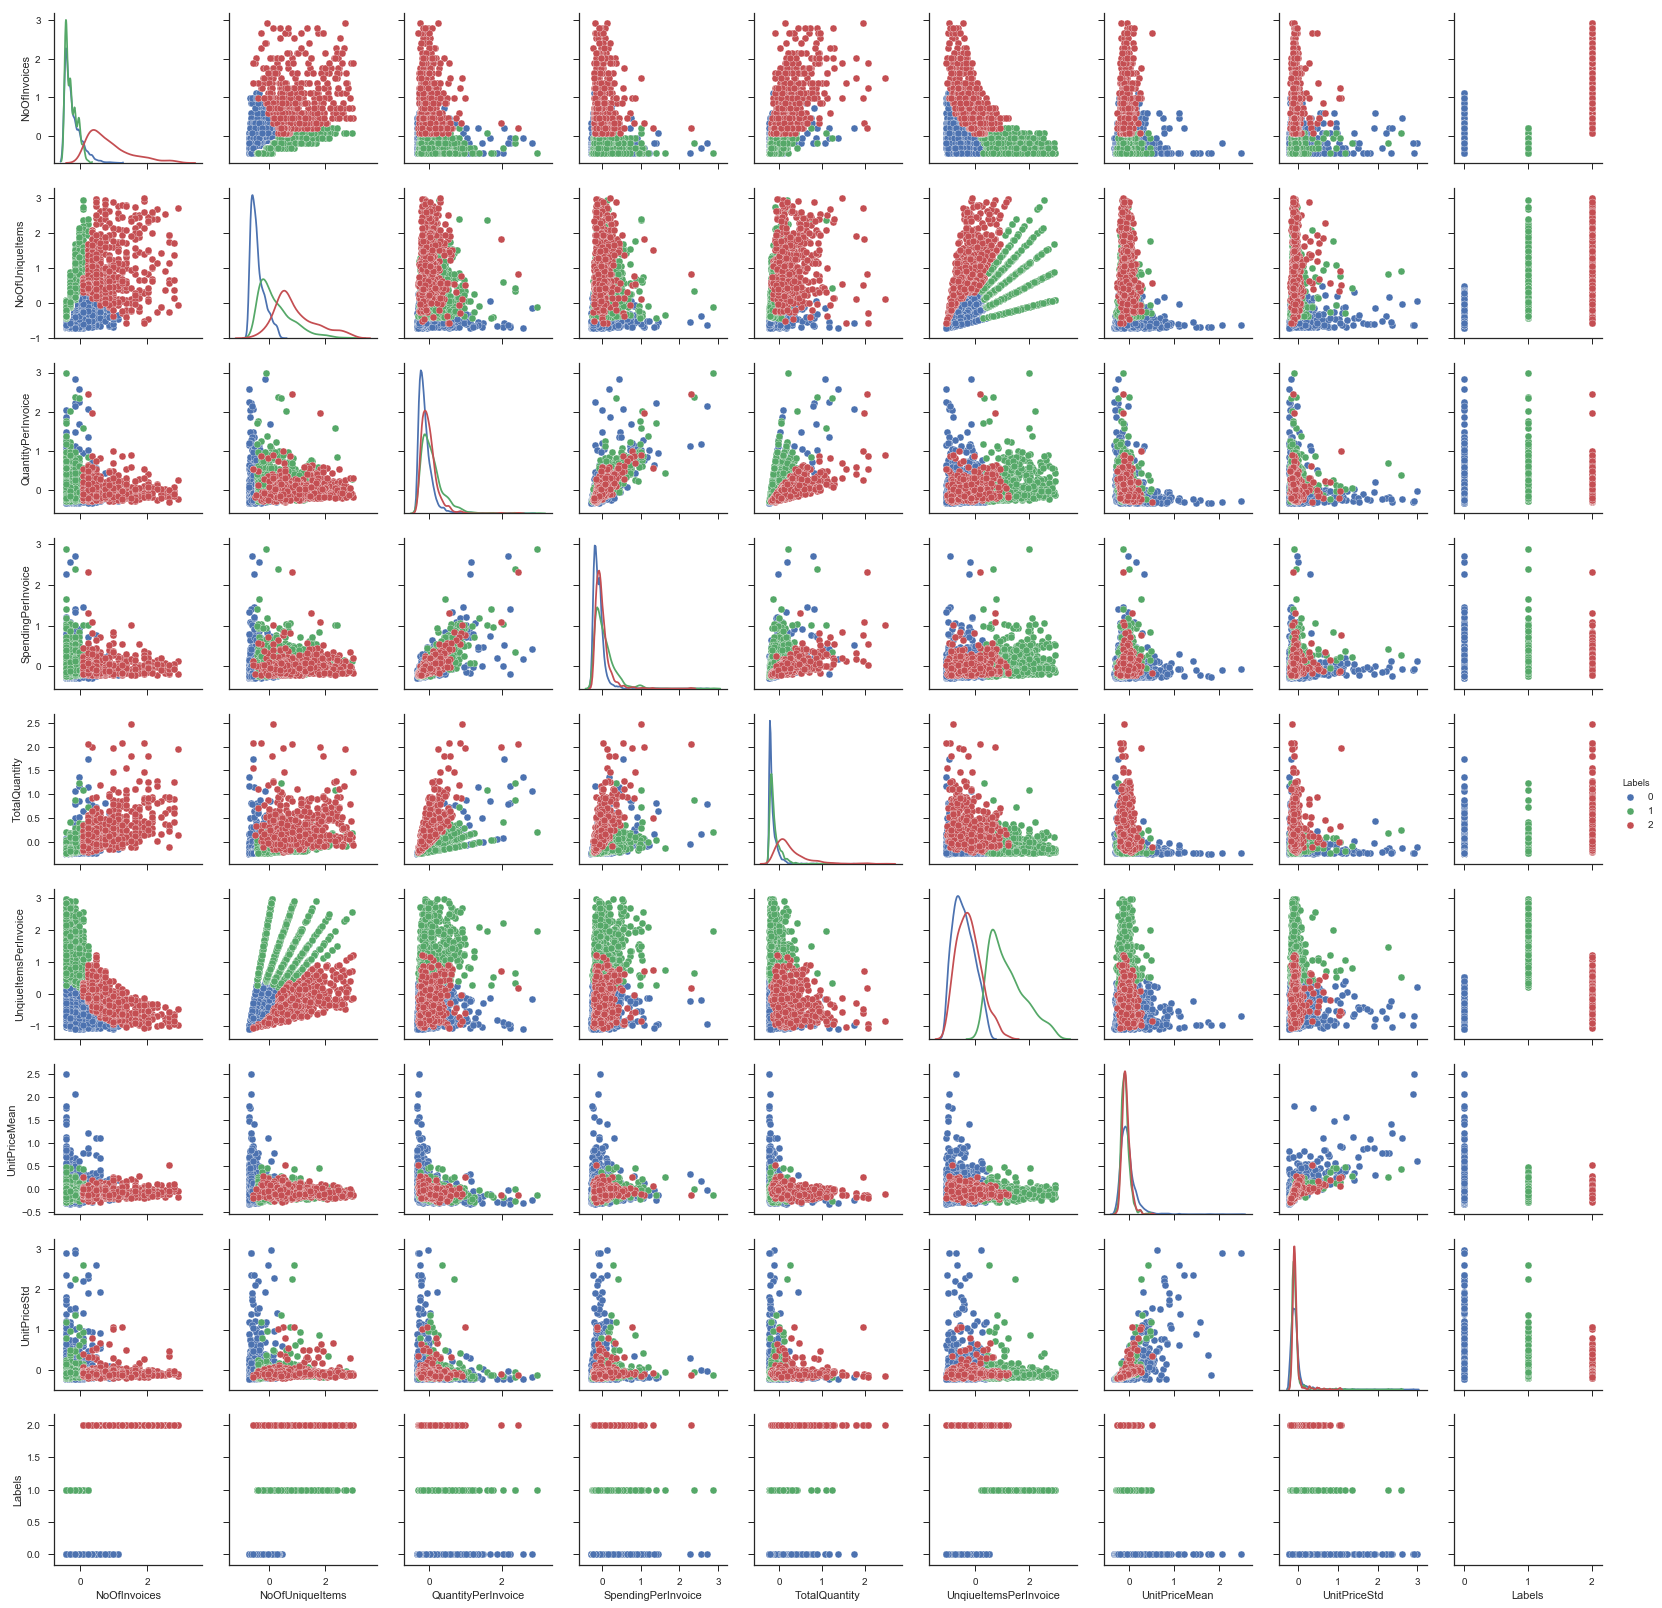

In [55]:
KM = KMeans(n_clusters=3)
km_labels = KM.fit_predict(df_scaled2)
df_scaled3 = df_scaled2.copy()
df_scaled3['Labels'] = km_labels
plots = sns.pairplot(df_scaled3,hue='Labels',diag_kind = 'kde')

C:\Users\Daniel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Daniel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


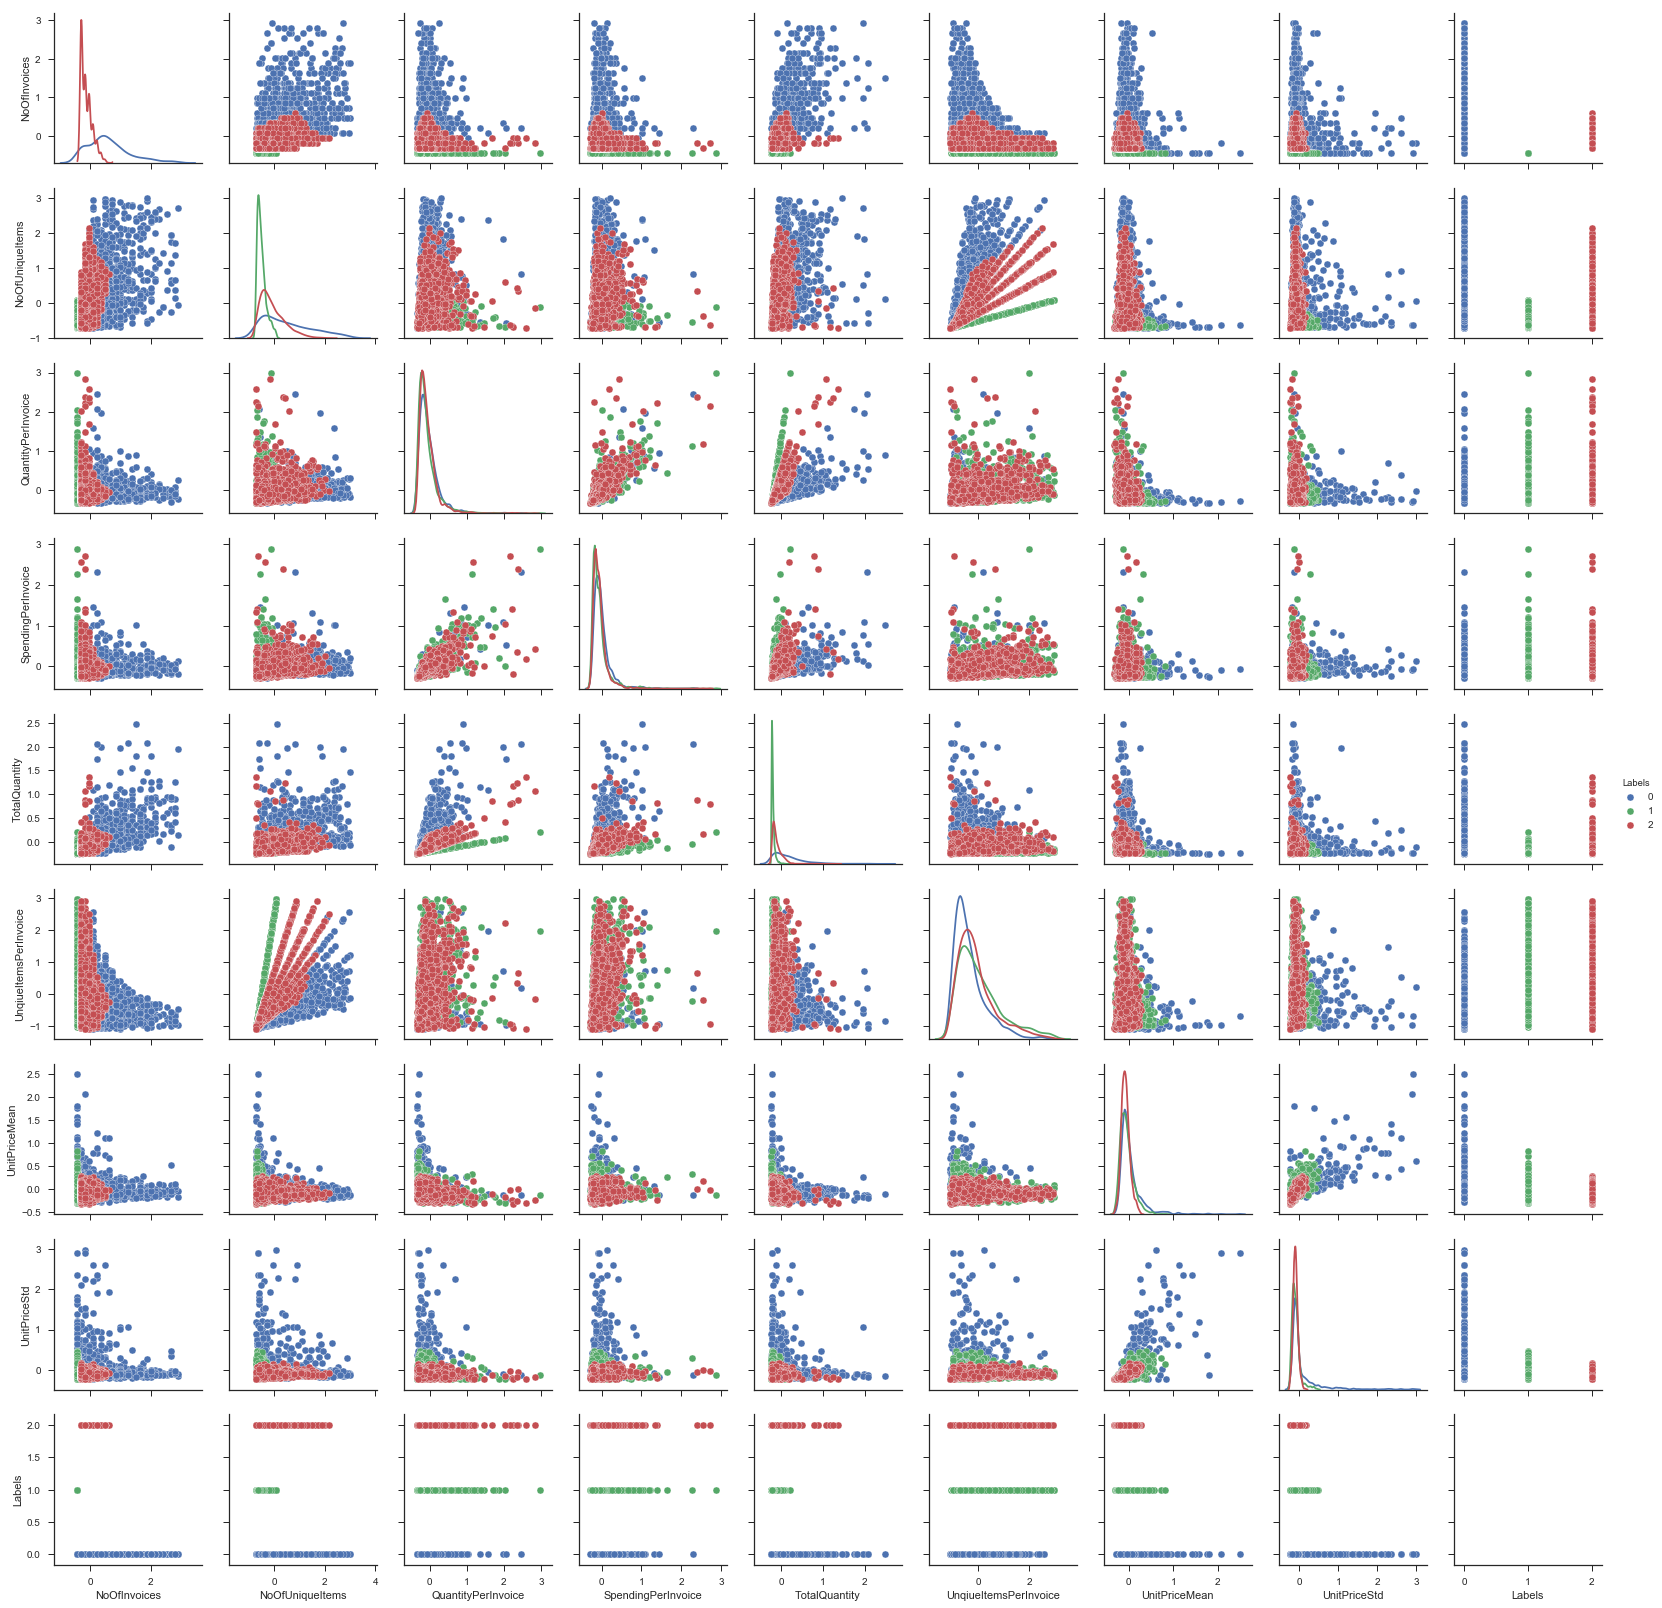

In [54]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

gmm = mixture.GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(df_scaled2)
df_scaled3 = df_scaled2.copy()
df_scaled3['Labels'] = gmm_labels
plots = sns.pairplot(df_scaled3,hue='Labels',diag_kind = 'kde')

### Model selection

1. Explain when it is appropriate to use K-Means, GMM and Hierarchical Clustering 
2. Which model would you choose for this dataset? 

K-Means: Can handle big data as it has lower resource complexity. Require knowledge of number of clusters and cluster should be spherical. Definite cluster.

Hierarchical clustering: Higher resource complexity (quadratic). Results can be reproduced. Do not need spherical clusters. Definite cluster.

GMM: Require knowledge of number of clusters. Soft clustering with probabilities being assigned.

Hierarchical clustering should be used when the number of clusters is not known whereas K-Means and GMM can be used when number of clusters are known. Additionally, K-Means can be used if definite clustering is required whereas GMM can be used if there is a possiblilty of mutiple labels being assigned to one set of data.

I would choose GMM for this dataset as there is a possibility that multiple labels may be assgined to the data.

### Opening the black box of clustering [reference pg 503](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

1. In your own words, explain the broad idea behind building a proximity matrix to cluster data. (This should also be verbally presented during Monday's presentation). 
*Sometimes, typing values into MS Excel helps with building intuition

A proximity matrix is required to understand the distance between 2 points within the same feature. Depending on the clustering algorithm, the distances can be used to group the data together.

2. In your own words, how would you calculate the disimilarity between objects in a dataset? (This should also be verbally presented during Monday's presentation)

I would calculate the distance between each object in the dataset for each feature.

### PCA for Dimensionality Reduction 

1. Using the dataset that you have pre-processed, construct a pairplot again. How is it different from the a plot of the raw data and what is your interpretation?  
2. Apply PCA pre-processed dataset. More information on PCA here [link]
3. Create a plot of cumulative explained variance and number of components. How does this inform you about the best number of components to select? 
4. Create a plot of PC0 against PC1, coloured by the GMM's predictions on the normalised dataset with outliers removed for n_components =7
5. How would you connect the Princip

In [69]:
from sklearn.decomposition import PCA
n_components = []
exp_var = []
for ii in range(1,6):
    n_components.append(ii)
    pca = PCA(n_components=ii)
    pcs = pca.fit(df_scaled2)
    exp_var.append(pcs.explained_variance_ratio_.sum())

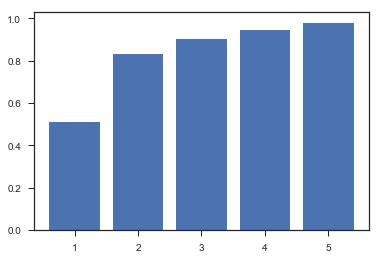

In [70]:
plt.bar(n_components,exp_var);

From the plot above, it seems that 2 principal components will be able to explain the majority of the variance in the dataset.